# The trend for the errors
This notebook answers the following questions:

- [X] What type of errors happend?
- [X] Hours of the day that more errors occurred?

In [78]:
import pandas as pd

## Loading lightning error

In [79]:
ltng_error_filtered = pd.read_csv("../../datasets/ltng_error_filtered.csv", low_memory=False)

In [80]:
ltng_error_filtered.head()

,CLIENT_GEO,PAGE_URL,PAGE_CONTEXT,PAGE_ENTITY_TYPE,TIMESTAMP,TIMESTAMP_DERIVED,UI_EVENT_SOURCE,UI_EVENT_TYPE,UI_EVENT_ID,USER_AGENT,COMPONENT_NAME,REPORT_ID_DERIVED
0,China/Fujian,/lightning/r/LiveChatTranscript/5706P000001RXN...,one:recordHomeFlexipage,LiveChatTranscript,2.022063e+13,2022-06-28T01:14:59.497Z,Error,error,ltng:error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,5706P000001RXN6QAO
1,China/Fujian,/lightning/r/LiveChatTranscript/5706P000001RXN...,one:recordHomeFlexipage,LiveChatTranscript,2.022063e+13,2022-06-28T01:14:59.502Z,Error,error,ltng:error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,5706P000001RXN6QAO
2,China/Fujian,/lightning/r/LiveChatTranscript/5706P000001RXN...,one:recordHomeFlexipage,LiveChatTranscript,2.022063e+13,2022-06-28T01:14:59.504Z,Error,error,ltng:error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,5706P000001RXN6QAO
3,United States/Texas,/lightning/r/LiveChatTranscript/5706P000000wJS...,one:recordHomeFlexipage,LiveChatTranscript,2.022063e+13,2022-06-28T01:15:09.829Z,TypeError,error,ltng:error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,5706P000000wJSFQA2
4,United States/Utah,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,reports:reportBase,Report,2.022063e+13,2022-06-28T01:17:00.510Z,Error,error,ltng:error,"""Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...",NaN,00O2R000004AmwmUAC


## Loading problematics (by error) above median

In [81]:
above_median_problematic_by_errors = pd.read_csv("../../datasets/above_median_problematic_by_errors.csv", low_memory=False)

In [82]:
above_median_problematic_by_errors

,ReportId,ErrorCount
0,00O0b000004AmRrEAK,162
1,00O0b000004keC5EAI,25
2,00O0b000006iNwdEAE,18
3,00O2R000004AmwmUAC,9
4,00O0b000004AmRjEAK,6
5,00O0b000004AnhWEAS,5
6,00O0b000004kTazEAE,3
7,00O2R000004Im5MUAS,3
8,00O0b000004AoOOEA0,3


## Loading active reports

In [83]:
active_reports = pd.read_csv("../../datasets/active_reports.csv", low_memory=False)

In [84]:
active_reports.shape

(9479, 4)

## Merging lightning error and active reports

In [85]:
ltng_reports = pd.merge(left=active_reports, right=ltng_error_filtered, left_on="Id", right_on="REPORT_ID_DERIVED")

In [86]:
ltng_reports.shape

(245, 16)

Removing useless columns

In [87]:
list(ltng_reports.columns)

['Id',
 'Name',
 'Format',
 'LastRunDate',
 'CLIENT_GEO',
 'PAGE_URL',
 'PAGE_CONTEXT',
 'PAGE_ENTITY_TYPE',
 'TIMESTAMP',
 'TIMESTAMP_DERIVED',
 'UI_EVENT_SOURCE',
 'UI_EVENT_TYPE',
 'UI_EVENT_ID',
 'USER_AGENT',
 'COMPONENT_NAME',
 'REPORT_ID_DERIVED']

In [88]:
interest_columns = ['REPORT_ID_DERIVED', 'UI_EVENT_SOURCE', 'UI_EVENT_TYPE','UI_EVENT_ID','TIMESTAMP_DERIVED']

In [89]:
ltng_reports = ltng_reports[interest_columns]

Getting the ids of problematic reports above the median

In [90]:
above_median_problematic_by_errors_id = list(above_median_problematic_by_errors['ReportId'])

Filtering problematic reports by those above the median

In [91]:
ltng_reports_filtered = ltng_reports[ltng_reports['REPORT_ID_DERIVED'].isin(above_median_problematic_by_errors_id)]

In [92]:
ltng_reports_filtered.shape

(234, 5)

In [93]:
ltng_reports_filtered.head()

,REPORT_ID_DERIVED,UI_EVENT_SOURCE,UI_EVENT_TYPE,UI_EVENT_ID,TIMESTAMP_DERIVED
0,00O2R000004AmwmUAC,Error,error,ltng:error,2022-06-28T01:17:00.510Z
1,00O2R000004AmwmUAC,Error,error,ltng:error,2022-06-28T01:17:00.509Z
2,00O2R000004AmwmUAC,Error,error,ltng:error,2022-07-05T07:21:35.026Z
3,00O2R000004AmwmUAC,Error,error,ltng:error,2022-07-05T07:46:29.681Z
4,00O2R000004AmwmUAC,unknown,error,ltng:error,2022-07-05T17:06:18.837Z


## Getting the hours of the day that more errors occured

Converting *TIMESTAMP_DERIVED* from type str to type date

In [94]:
type(ltng_reports_filtered['TIMESTAMP_DERIVED'][0])

str

In [95]:
import datetime
from datetime import date

ltng_reports_filtered['TIMESTAMP_DERIVED'] = pd.to_datetime(ltng_reports_filtered['TIMESTAMP_DERIVED']
                                                                     , infer_datetime_format=True)

C:\Users\Matheus\AppData\Local\Temp/ipykernel_20764/1208685902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltng_reports_filtered['TIMESTAMP_DERIVED'] = pd.to_datetime(ltng_reports_filtered['TIMESTAMP_DERIVED']


In [96]:
type(ltng_reports_filtered['TIMESTAMP_DERIVED'][0])

pandas._libs.tslibs.timestamps.Timestamp

Getting the hours and the days from *TIMESTAMP_DERIVED* column

In [97]:
hour_rows = []
day_rows = []

for i in ltng_reports_filtered.index:
    hour_rows.append(ltng_reports_filtered['TIMESTAMP_DERIVED'][i].hour)
    day_rows.append(ltng_reports_filtered['TIMESTAMP_DERIVED'][i].day)

In [98]:
print(f"Hours: {len(hour_rows)}, days: {len(day_rows)}")

Hours: 234, days: 234


Creating a column with the hour and day data

In [99]:
ltng_reports_filtered['TIMESTAMP_DERIVED_HOUR'] = hour_rows
ltng_reports_filtered['TIMESTAMP_DERIVED_DAY'] = day_rows

C:\Users\Matheus\AppData\Local\Temp/ipykernel_20764/1465563336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltng_reports_filtered['TIMESTAMP_DERIVED_HOUR'] = hour_rows
C:\Users\Matheus\AppData\Local\Temp/ipykernel_20764/1465563336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltng_reports_filtered['TIMESTAMP_DERIVED_DAY'] = day_rows


In [100]:
list(ltng_reports_filtered.columns)

['REPORT_ID_DERIVED',
 'UI_EVENT_SOURCE',
 'UI_EVENT_TYPE',
 'UI_EVENT_ID',
 'TIMESTAMP_DERIVED',
 'TIMESTAMP_DERIVED_HOUR',
 'TIMESTAMP_DERIVED_DAY']

Getting a count of erros by hour

In [101]:
ltng_reports_filtered_group_by_hour = ltng_reports_filtered.groupby([
    'TIMESTAMP_DERIVED_HOUR']).agg({'UI_EVENT_ID': 'count'})

Renaming the column of *UI_EVENT_ID* to *UI_EVENT_COUNT*

In [102]:
ltng_reports_filtered_group_by_hour.rename(columns={'UI_EVENT_ID': 'UI_EVENT_COUNT'}, inplace = True)

Reseting index

In [103]:
ltng_reports_filtered_group_by_hour.reset_index(inplace=True)

In [104]:
ltng_reports_filtered_group_by_hour

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_COUNT
0,1,7
1,2,6
2,4,5
3,7,144
4,8,35
5,9,28
6,17,9


Getting the data for the visualization

In [105]:
list_of_hour = ltng_reports_filtered_group_by_hour['TIMESTAMP_DERIVED_HOUR'].tolist()
list_of_ui_event_id_count = ltng_reports_filtered_group_by_hour['UI_EVENT_COUNT'].tolist()

Graph relating the number of errors and the hour of the day

In [106]:
import numpy as np
import matplotlib.pyplot as plt

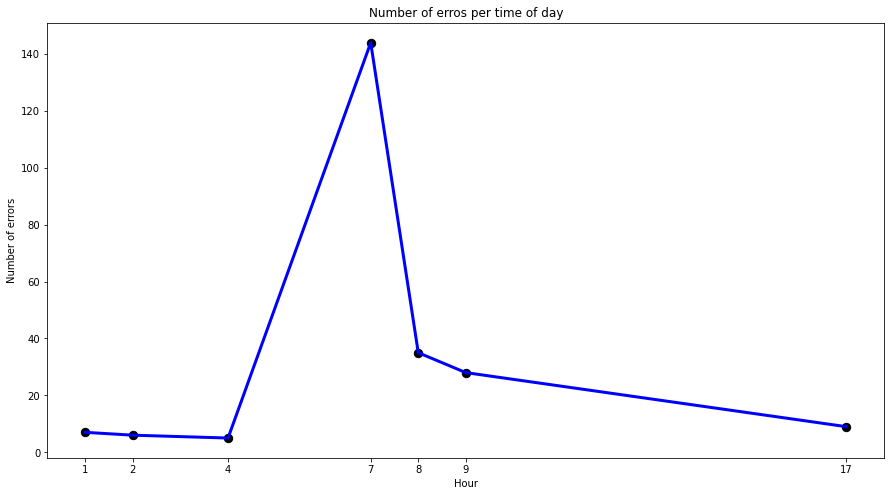

In [107]:
plt.figure(figsize=(15, 8))
plt.title("Number of erros per time of day")
plt.xlabel("Hour")
plt.ylabel("Number of errors")
plt.scatter(list_of_hour, list_of_ui_event_id_count, label = "Number of errors", color = "black", s =
70)
plt.xticks(list_of_hour,list_of_hour)
plt.plot(list_of_hour, list_of_ui_event_id_count, color = "blue", linestyle = "-", linewidth = 3)

### by Days

In [108]:
ltng_reports_filtered['TIMESTAMP_DERIVED_DAY'].unique()

array([28,  5, 11, 22, 27,  4], dtype=int64)

In [109]:
ltng_reports_filtered_group_by_day = ltng_reports_filtered.groupby([
    'TIMESTAMP_DERIVED_DAY']).agg({'UI_EVENT_ID': 'count'})

In [110]:
ltng_reports_filtered_group_by_day.reset_index(inplace=True)

In [111]:
ltng_reports_filtered_group_by_day

,TIMESTAMP_DERIVED_DAY,UI_EVENT_ID
0,4,5
1,5,34
2,11,51
3,22,6
4,27,131
5,28,7


In [112]:
list_of_day = ltng_reports_filtered_group_by_day['TIMESTAMP_DERIVED_DAY'].tolist()
list_of_ui_event_id_count = ltng_reports_filtered_group_by_day['UI_EVENT_ID'].tolist()

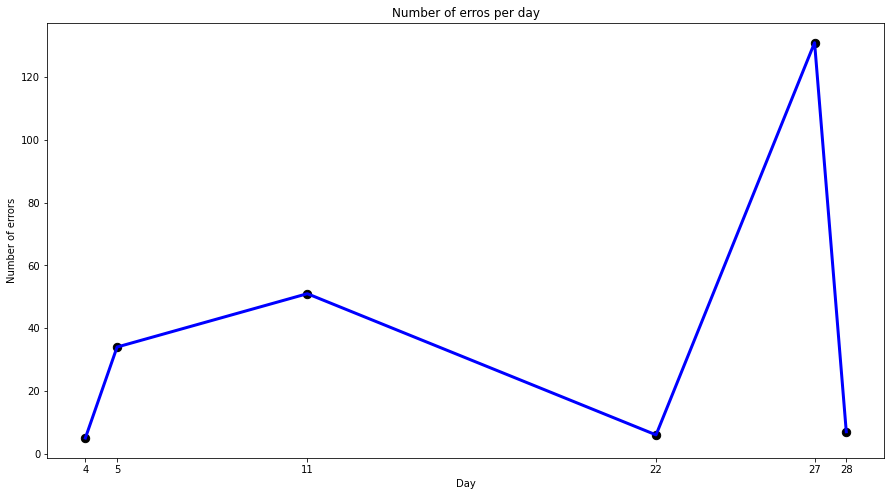

In [113]:
plt.figure(figsize=(15, 8))
plt.title("Number of erros per day")
plt.xlabel("Day")
plt.ylabel("Number of errors")
plt.scatter(list_of_day, list_of_ui_event_id_count, label = "Number of errors", color = "black", s =
70)
plt.xticks(list_of_day,list_of_day)
plt.plot(list_of_day, list_of_ui_event_id_count, color = "blue", linestyle = "-", linewidth = 3)

Sorting hours by count

In [114]:
ltng_reports_filtered_group_sorted = ltng_reports_filtered_group_by_hour.sort_values(by='UI_EVENT_COUNT', ascending=False)

In [115]:
ltng_reports_filtered_group_sorted

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_COUNT
3,7,144
4,8,35
5,9,28
6,17,9
0,1,7
1,2,6
2,4,5


Considering 5 hours as the peak time

In [116]:
number_of_top_hours = 3

top_hours = ltng_reports_filtered_group_sorted.head(number_of_top_hours)

In [117]:
top_hours = top_hours.sort_values(by=['TIMESTAMP_DERIVED_HOUR'])

In [118]:
top_hours = top_hours.reset_index()

In [119]:
top_hours_values = []

print("The top hours are: ", end="")
for i in top_hours.index:
    value = top_hours['TIMESTAMP_DERIVED_HOUR'][i]
    
    top_hours_values.append(value)
    
    if i == len(top_hours) - 1:
        print(f"{value}", end="")
    elif i == len(top_hours) - 2:
        print(f"{value} and ", end="")
    else:
        print(f"{value}, ", end="")

The top hours are: 7, 8 and 9

---

## Analyzing the most common error types by day

Getting the count of errors for each type of error

In [120]:
ltng_reports_filtered_group_error = ltng_reports_filtered.groupby(['UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [121]:
ltng_reports_filtered_group_error.rename(columns={'UI_EVENT_ID': 'UI_EVENT_COUNT'}, inplace = True)

In [122]:
ltng_reports_filtered_group_error

,UI_EVENT_COUNT
UI_EVENT_SOURCE,
Error,212
TypeError,21
unknown,1


Viewing the data

Text(0.5, 1.0, 'Types of errors that appear the most during the day')

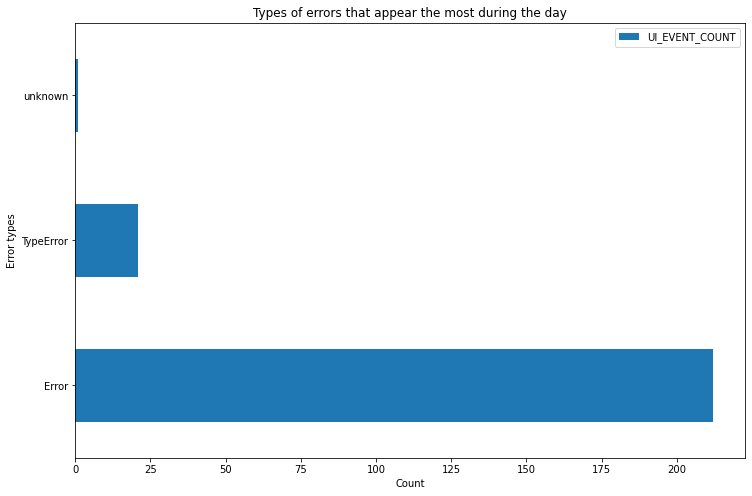

In [123]:
graph = ltng_reports_filtered_group_error.plot.barh(figsize=(12, 8))
graph.set_ylabel('Error types')
graph.set_xlabel('Count')
graph.set_title('Types of errors that appear the most during the day')

### Getting top error types by day

In [124]:
ltng_reports_filtered_group_error.reset_index(inplace=True)

In [125]:
error_types_by_day_values = []

for i in ltng_reports_filtered_group_error.index:
    value = ltng_reports_filtered_group_error['UI_EVENT_SOURCE'][i]
    
    error_types_by_day_values.append(value)
    
    print(f"{i + 1} - {value}")

1 - Error
2 - TypeError
3 - unknown


---

## Analyzing the most common error types by peak time

Peak time hours

In [126]:
top_hours_values

[7, 8, 9]

Filtering the data by top hours

In [127]:
ltng_reports_filtered.shape


(234, 7)

In [128]:
ltng_reports_filtered_by_hour = ltng_reports_filtered[ltng_reports_filtered
                                                                         .TIMESTAMP_DERIVED_HOUR.isin(top_hours_values)]

In [129]:
ltng_reports_filtered_by_hour.shape


(207, 7)

Grouping the count of errors by *UI_EVENT_SOURCE*

In [130]:
ltng_reports_filtered_by_hour_group = ltng_reports_filtered_by_hour.groupby([
    'UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [131]:
ltng_reports_filtered_by_hour_group.rename(columns={'UI_EVENT_ID': 'UI_EVENT_COUNT'}, inplace = True)

In [132]:
ltng_reports_filtered_by_hour_group

,UI_EVENT_COUNT
UI_EVENT_SOURCE,
Error,197
TypeError,10


Viewing the data

Text(0.5, 1.0, 'Types of errors that appear the most during the day')

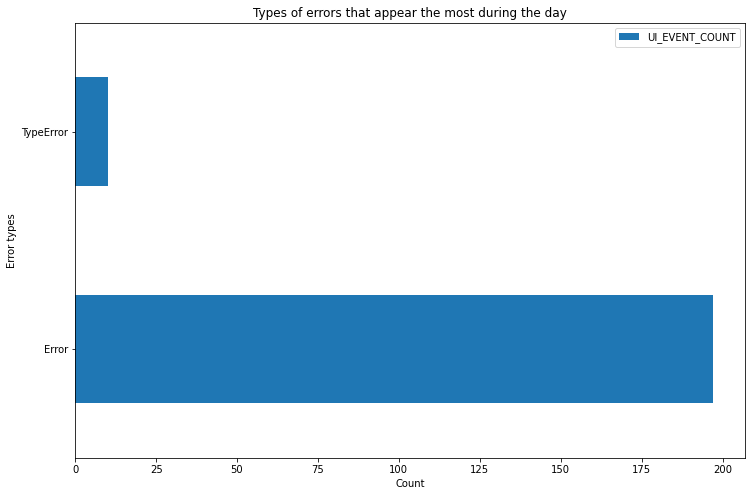

In [133]:
graph = ltng_reports_filtered_by_hour_group.plot.barh(figsize=(12, 8))
graph.set_ylabel('Error types')
graph.set_xlabel('Count')
graph.set_title('Types of errors that appear the most during the day')

### Getting top error types by peak time

In [134]:
ltng_reports_filtered_by_hour_group.reset_index(inplace=True)

In [135]:
error_types_by_peak_time_values = []

for i in ltng_reports_filtered_by_hour_group.index:
    value = ltng_reports_filtered_by_hour_group['UI_EVENT_SOURCE'][i]
    
    error_types_by_peak_time_values.append(value)
    print(f"{i + 1} - {value}")

1 - Error
2 - TypeError


---

## Analyzing types of errors by peak time

Getting the count of erros for each group of type and peak time hour

In [136]:
ltng_reports_filtered_by_hour_group = ltng_reports_filtered_by_hour.groupby(['TIMESTAMP_DERIVED_HOUR', 
                                                     'UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

Reseting index

In [137]:
ltng_reports_filtered_by_hour_group = ltng_reports_filtered_by_hour_group.reset_index()

In [138]:
ltng_reports_filtered_by_hour_group

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_SOURCE,UI_EVENT_ID
0,7,Error,139
1,7,TypeError,5
2,8,Error,33
3,8,TypeError,2
4,9,Error,25
5,9,TypeError,3


Getting the data for the visualization 

In [139]:
list_of_hour = ltng_reports_filtered_by_hour_group['TIMESTAMP_DERIVED_HOUR'].tolist()
list_of_ui_event_source = ltng_reports_filtered_by_hour_group['UI_EVENT_SOURCE'].tolist()
list_of_ui_event_id_count = ltng_reports_filtered_by_hour_group['UI_EVENT_ID'].tolist()

Getting the result dictionary format

In [140]:
result = {}

def dictionary_format(list_types_of_erros, list_elements): 
    result = {}
    
    for element in list_elements:
        result[element] = []
        for i in range(len(list_types_of_erros)):
            result[element].append(0)
    
    return result

result = dictionary_format(error_types_by_peak_time_values, top_hours_values)
result

{7: [0, 0], 8: [0, 0], 9: [0, 0]}

Mapping type of error to position

In [141]:
map_types = {}

def mapping_type_to_position(list_types_of_erros):
    for i in range(len(list_types_of_erros)):
        map_types[list_types_of_erros[i]] = i
        
mapping_type_to_position(error_types_by_peak_time_values)
map_types

{'Error': 0, 'TypeError': 1}

Getting the amount of errors for each type and time

In [142]:
def get_amount(list_types, list_of_all_types, list_elements, list_of_all_elements):
    for unique_type in list_types:
        for i in range(len(list_of_all_types)):
            if list_of_all_types[i] == unique_type:
                if list_of_all_elements[i] in list_elements:
                    result[list_of_all_elements[i]][map_types[unique_type]] += list_of_ui_event_id_count[i]
                    
get_amount(error_types_by_peak_time_values, list_of_ui_event_source, top_hours_values, list_of_hour)
result

{7: [139, 5], 8: [33, 2], 9: [25, 3]}

Getting the dictionary relating types of errors and the count by peak hour

In [143]:
errors_dict = {}

for error_type in error_types_by_peak_time_values:
    errors_dict[error_type] = []
    
for error_type in error_types_by_peak_time_values:
    for error_count in result.values():  
        errors_dict[error_type].append(error_count[map_types[error_type]])
        
errors_dict

{'Error': [139, 33, 25], 'TypeError': [5, 2, 3]}

Getting the max value of count

In [144]:
max_value = 0

for error_count in errors_dict.values():
    max_value = max(max_value, max(error_count))
    
max_value

139

Viewing the data

Text(0, 0.5, 'Count of errors')

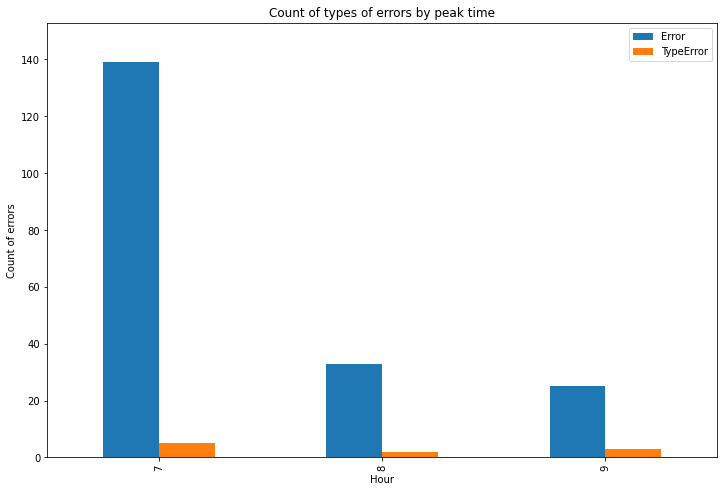

In [145]:
df = pd.DataFrame({'Hour': top_hours_values})
for error_type in error_types_by_peak_time_values:
    df[error_type] = errors_dict[error_type]

ylim_value = (0, max_value + 0.1 * max_value)
df.plot(x="Hour", y=error_types_by_peak_time_values, kind="bar", figsize=(12, 8), title='Count of types of errors by peak time', ylim=ylim_value).set_ylabel("Count of errors")

---

## Analyzing types of errors by day

In [146]:
ltng_reports_filtered

,REPORT_ID_DERIVED,UI_EVENT_SOURCE,UI_EVENT_TYPE,UI_EVENT_ID,TIMESTAMP_DERIVED,TIMESTAMP_DERIVED_HOUR,TIMESTAMP_DERIVED_DAY
0,00O2R000004AmwmUAC,Error,error,ltng:error,2022-06-28 01:17:00.510000+00:00,1,28
1,00O2R000004AmwmUAC,Error,error,ltng:error,2022-06-28 01:17:00.509000+00:00,1,28
2,00O2R000004AmwmUAC,Error,error,ltng:error,2022-07-05 07:21:35.026000+00:00,7,5
3,00O2R000004AmwmUAC,Error,error,ltng:error,2022-07-05 07:46:29.681000+00:00,7,5
4,00O2R000004AmwmUAC,unknown,error,ltng:error,2022-07-05 17:06:18.837000+00:00,17,5
...,...,...,...,...,...,...,...
239,00O0b000004keC5EAI,Error,error,ltng:error,2022-07-27 07:55:46.503000+00:00,7,27
240,00O0b000004keC5EAI,Error,error,ltng:error,2022-07-27 07:55:46.500000+00:00,7,27
241,00O0b000004keC5EAI,Error,error,ltng:error,2022-07-27 09:03:19.938000+00:00,9,27
242,00O0b000004keC5EAI,Error,error,ltng:error,2022-07-27 09:03:19.939000+00:00,9,27


Getting the count of erros for each group of type and hour of the day

In [147]:
ltng_reports_filtered_group = ltng_reports_filtered.groupby(['TIMESTAMP_DERIVED_HOUR', 
                                                     'UI_EVENT_SOURCE']).agg({'UI_EVENT_ID': 'count'})

In [148]:
ltng_reports_filtered_group

UI_EVENT_ID
TIMESTAMP_DERIVED_HOUR UI_EVENT_SOURCE             
1                      Error                      7
2                      Error                      6
4                      Error                      2
                       TypeError                  3
7                      Error                    139
                       TypeError                  5
8                      Error                     33
                       TypeError                  2
9                      Error                     25
                       TypeError                  3
17                     TypeError                  8
                       unknown                    1

Reseting index

In [149]:
ltng_reports_filtered_group.reset_index(inplace=True)

In [150]:
ltng_reports_filtered_group

,TIMESTAMP_DERIVED_HOUR,UI_EVENT_SOURCE,UI_EVENT_ID
0,1,Error,7
1,2,Error,6
2,4,Error,2
3,4,TypeError,3
4,7,Error,139
5,7,TypeError,5
6,8,Error,33
7,8,TypeError,2
8,9,Error,25
9,9,TypeError,3


Getting the data

In [151]:
list_of_hour = ltng_reports_filtered_group['TIMESTAMP_DERIVED_HOUR'].tolist()
list_of_ui_event_source = ltng_reports_filtered_group['UI_EVENT_SOURCE'].tolist()
list_of_ui_event_id_count = ltng_reports_filtered_group['UI_EVENT_ID'].tolist()
list_of_unique_hour = ltng_reports_filtered_group['TIMESTAMP_DERIVED_HOUR'].unique()

Getting the result dictionary format

In [152]:
result = dictionary_format(error_types_by_day_values, list_of_hour)
result

{1: [0, 0, 0],
 2: [0, 0, 0],
 4: [0, 0, 0],
 7: [0, 0, 0],
 8: [0, 0, 0],
 9: [0, 0, 0],
 17: [0, 0, 0]}

Mapping the type of error to position

In [153]:
mapping_type_to_position(error_types_by_day_values)

Getting the amount of errors for each type and time

In [154]:
get_amount(error_types_by_day_values, list_of_ui_event_source, list_of_hour, list_of_hour)
result

{1: [7, 0, 0],
 2: [6, 0, 0],
 4: [2, 3, 0],
 7: [139, 5, 0],
 8: [33, 2, 0],
 9: [25, 3, 0],
 17: [0, 8, 1]}

In [155]:
errors_dict = {}

for error_type in error_types_by_day_values:
    errors_dict[error_type] = []
    
for error_type in error_types_by_day_values:
    for error_count in result.values():  
        errors_dict[error_type].append(error_count[map_types[error_type]])
        
errors_dict

{'Error': [7, 6, 2, 139, 33, 25, 0],
 'TypeError': [0, 0, 3, 5, 2, 3, 8],
 'unknown': [0, 0, 0, 0, 0, 0, 1]}

In [156]:
max_value = 0

for error_count in errors_dict.values():
    max_value = max(max_value, max(error_count))
    
max_value

139

Viewing the data

Text(0, 0.5, 'Count of errors')

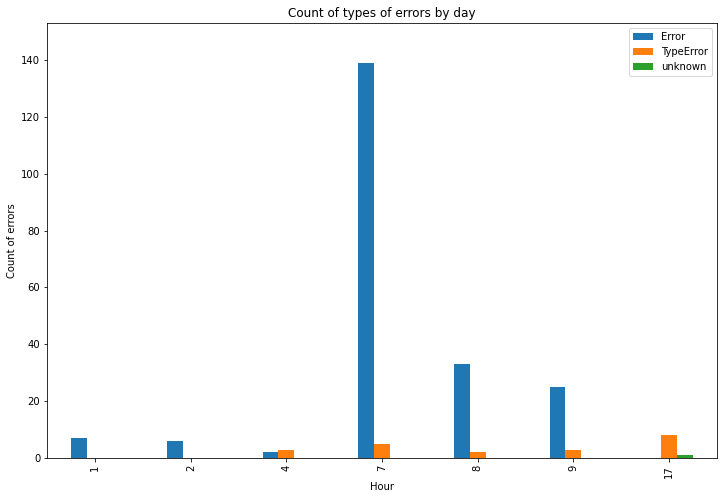

In [157]:
df = pd.DataFrame({'Hour': list_of_unique_hour})

for error_type in error_types_by_day_values:
    df[error_type] = errors_dict[error_type]

ylim_value = (0, max_value + 0.1 * max_value)
df.plot(x="Hour", y=error_types_by_day_values, kind="bar", figsize=(12, 8), title='Count of types of errors by day', ylim=ylim_value).set_ylabel("Count of errors")